In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
Data = pd.read_excel('results.xlsx', names=['time', 'q1', 'q2', 'q3'])
df = Data.drop('time', axis=1)

In [170]:
ser_q1 = df['q1'].apply(lambda x: x.split(','))
q1 = pd.get_dummies(ser_q1.apply(pd.Series).stack()).sum(level=0)
q1 = q1.drop([' на даче', ' на шашлыках)', ' компьютеру', 'во время уборки)', ' видеоролики'], axis=1)

l1 = q1.T
l1['SUMM'] = l1.T.sum()
l1.sort_values(by='SUMM', ascending=False)[:5].sort_values(by='SUMM', ascending=True)


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,SUMM
Чтобы включать музыку во время спорта,0,1,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,20
Чтобы включать музыку на вечеринке,1,1,0,0,1,0,1,0,1,1,...,1,0,1,0,1,0,1,1,0,36
Чтобы включать музыку дома (например,0,1,1,1,0,1,1,1,1,1,...,1,0,1,1,0,0,0,0,0,50
Чтобы включать музыку на посиделках с друзьями,1,1,0,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,59
Чтобы слушать музыку на свежем воздухе (например,1,1,0,0,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,61


In [171]:
ser_q2 = df['q2'].apply(lambda x: x.split(','))
q2 = pd.get_dummies(ser_q2.apply(pd.Series).stack()).sum(level=0)
q2 = q2.drop([' маленький модельный ряд (мало цветов', ' скудный дизайн)'], axis=1)

l2 = q2.T
l2['SUMM'] = l2.T.sum()
l2.sort_values(by='SUMM', ascending=False)[1:4]

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,SUMM
Недостаточная громкость,1,1,0,1,1,0,1,0,1,1,...,1,0,1,0,1,1,1,1,0,55
Высокая цена,0,1,0,1,1,1,0,0,1,1,...,1,0,1,0,0,1,1,0,1,53
Плохо держит зарядку,0,1,0,1,1,1,0,0,1,1,...,1,0,0,0,0,1,0,0,1,44


In [172]:
ser_q3 = df['q3'].apply(lambda x: x.split(','))
q3 = pd.get_dummies(ser_q3.apply(pd.Series).stack()).sum(level=0)
q3 = q3.drop([' аукс)', 'бдыщь', "Хз"], axis=1)

l3 = q3.T
l3['SUMM'] = l3.T.sum()
l3.sort_values(by='SUMM', ascending=False)[:3]

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,SUMM
Полное техническое оснащение (провод для зарядки,1,0,0,1,1,1,1,1,0,1,...,0,0,1,0,1,0,0,0,1,53
Гарантия,1,1,0,1,0,0,0,1,0,1,...,1,0,1,1,0,1,0,0,1,37
Возможность доставки,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16


In [173]:
res_df = pd.merge(q1, q2, left_index=True, right_index=True)
res_df = pd.merge(res_df, q3, left_index=True, right_index=True)
res_df.columns = list(map(lambda x: x.strip(), res_df.columns))
res_df.drop(['Наличие плохих отзывов', 'Плохо держит зарядку'], axis=1, inplace=True)
res_df.columns
res_df.columns = list(map(lambda x: 'Нет проводов' if x == 'Полное техническое оснащение (провод для зарядки' else x, res_df.columns))
res_df.columns = list(map(lambda x: 'Музыка дома' if x == 'Чтобы включать музыку дома (например' else x, res_df.columns))
res_df.columns = list(map(lambda x: 'С друзьями' if x == 'Чтобы включать музыку на посиделках с друзьями' else x, res_df.columns))
# res_df.columns = list(map(lambda x: 'Есть гарантия' if x == 'Гарантия' else x, res_df.columns))
res_df.columns = list(map(lambda x: 'На улице' if x == 'Чтобы слушать музыку на свежем воздухе (например' else x, res_df.columns))
res_df.columns = list(map(lambda x: 'На вечеринке' if x == 'Чтобы включать музыку на вечеринке' else x, res_df.columns))
res_df.columns = list(map(lambda x: 'Громкий звук' if x == 'Недостаточная громкость' else x, res_df.columns))




SEGMENT - 51
1. На улице - 50 (98.0)
2. С друзьями - 47 (92.2)
3. Громкий звук - 44 (86.3)
4. На вечеринке - 36 (70.6)
5. Высокая цена - 36 (70.6)


SEGMENT - 33
1. Нет проводов - 18 (54.5)
2. Высокая цена - 17 (51.5)
3. Музыка дома - 16 (48.5)
4. Гарантия - 13 (39.4)
5. С друзьями - 12 (36.4)


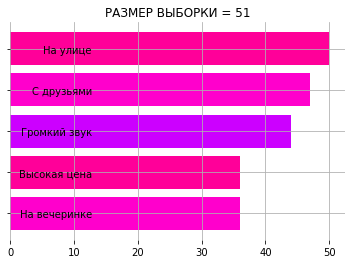

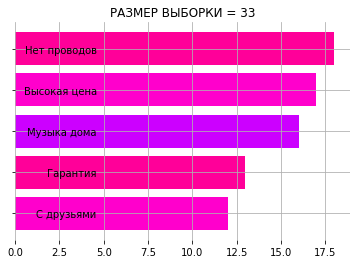

In [174]:
knn_clust = KMeans(n_clusters=2, random_state=12).fit(res_df)
arr = knn_clust.predict(res_df)

res_df['segments'] = arr
seg_1 = res_df[res_df['segments'] == 0].drop('segments', axis=1)
seg_2 = res_df[res_df['segments'] == 1].drop('segments', axis=1)
seg_3 = res_df[res_df['segments'] == 2].drop('segments', axis=1)

res_1 = seg_1.T
res_2 = seg_2.T
res_3 = seg_3.T

results = [res_1, res_2]
k = '1'
for x in results:
    x['SUMM'] = x.T.sum()
    x = x.sort_values(by='SUMM', ascending=False)[:5].sort_values(by='SUMM', ascending=True)
    y = x.sort_values(by='SUMM', ascending=False)[:5]
    x.index = list(map(lambda y: y.split('(')[0], x.index))

    fig, ax = plt.subplots(1, 1)
    ax.barh(x['SUMM'].index, x['SUMM'].values, color=['#FF00CC', '#FF0099', '#CC00FF'])
    title = "РАЗМЕР ВЫБОРКИ = " + str(x.shape[1]-1)
    ax.set_title(label=title)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', pad=-85)
    ax.yaxis.set_label_position("right")

    ax.grid()
    plt.savefig(k + '.png')
    k += '1'
    arr = y

    iterator = list(arr.index)
    print('\n\nSEGMENT - ' + str(x.shape[1]-1))
    for i in iterator:
        text = str(iterator.index(i)+1) + '. ' + i.split('(')[0] + " - " + str(arr.loc[i, 'SUMM']) + " (" + str(round(arr.loc[i, 'SUMM']/(x.shape[1]-1)*100, 1)) + ")"
        print(text)